In [80]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import  Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
train_path = 'F:\\Desktop\\Pycharm Professional Edition File\\Neural Network\\cats-dogs\\train'
test_path = 'F:\\Desktop\\Pycharm Professional Edition File\\Neural Network\\cats-dogs\\test'
valid_path = 'F:\\Desktop\\Pycharm Professional Edition File\\Neural Network\\cats-dogs\\valid'

In [124]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=70)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)

Found 280 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [105]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):

    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

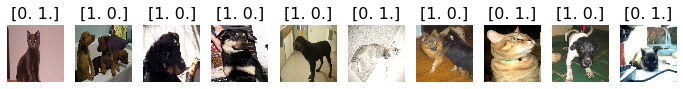

In [106]:
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

## Build and Train CNN

In [39]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit_generator(train_batches, steps_per_epoch=28,validation_data=valid_batches,validation_steps=18, epochs=5, verbose=2)

Epoch 1/5
 - 8s - loss: 507.2967 - accuracy: 0.5107 - val_loss: 141.6438 - val_accuracy: 0.5139
Epoch 2/5
 - 7s - loss: 139.9437 - accuracy: 0.6286 - val_loss: 390.6797 - val_accuracy: 0.5000
Epoch 3/5
 - 6s - loss: 432.1736 - accuracy: 0.5286 - val_loss: 981.8999 - val_accuracy: 0.5000
Epoch 4/5
 - 7s - loss: 119.0810 - accuracy: 0.7464 - val_loss: 128.2254 - val_accuracy: 0.5278
Epoch 5/5
 - 7s - loss: 44.2557 - accuracy: 0.8464 - val_loss: 252.8258 - val_accuracy: 0.5417


## Predict

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


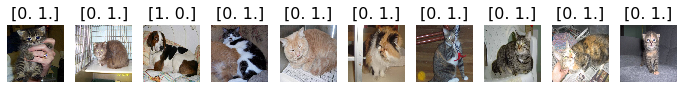

In [43]:
test_images, test_labels = next(test_batches)
plots(test_images, titles=test_labels)

In [44]:
test_labels.shape

(10, 2)

In [45]:
test_labels = test_labels[:,0]
#test_labels=test_labels.reshape(-1,1)

In [46]:
type(test_labels)
test_labels.shape

(10,)

In [47]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions.shape
predictions = predictions.round()

In [48]:
#CREATING CONFUSION MARIRIX

In [49]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
prediction=predictions[:,0]
cm = confusion_matrix(test_labels, predictions[:,0])
def plot_confusion_matrix(cm,classes,normalize=False,
                          title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('confusion  matrix without normalization')
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

confusion  matrix without normalization
[[7 2]
 [0 1]]


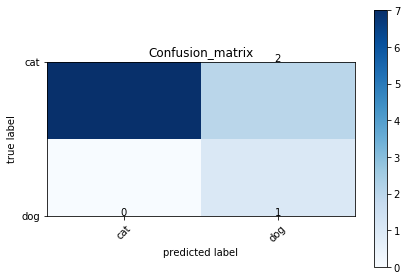

In [50]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

# Build fine tuned vgg 16 model

In [51]:
vgg16_model = keras.applications.vgg16.VGG16()

In [55]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [53]:
vgg16_model.layers.pop

<function list.pop(index=-1, /)>

In [54]:
type(vgg16_model)

keras.engine.training.Model

In [76]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [81]:
for layer in model.layers:
    layer.trainable = False

In [82]:
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [84]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_batches, steps_per_epoch=28,validation_data=valid_batches,validation_steps=18, epochs=5, verbose=2)

Epoch 1/5
 - 84s - loss: 0.7038 - accuracy: 0.7071 - val_loss: 1.1210 - val_accuracy: 0.8611
Epoch 2/5
 - 91s - loss: 0.2454 - accuracy: 0.8893 - val_loss: 0.0826 - val_accuracy: 0.9167
Epoch 3/5
 - 92s - loss: 0.1530 - accuracy: 0.9357 - val_loss: 0.1809 - val_accuracy: 0.9444
Epoch 4/5
 - 93s - loss: 0.1137 - accuracy: 0.9571 - val_loss: 0.0529 - val_accuracy: 0.9583
Epoch 5/5
 - 95s - loss: 0.0868 - accuracy: 0.9750 - val_loss: 0.0045 - val_accuracy: 0.9583


## Predict using VGG model

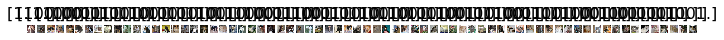

In [140]:
test_images, test_labels = next(test_batches)
plots(test_images, titles= test_labels)

In [141]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0.], dtype=float32)

In [142]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [100]:
#CREATING CONFUSION MARIRIX

In [143]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

In [144]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [145]:
def plot_confusion_matrix(cm,classes,normalize=False,
                          title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('confusion  matrix without normalization')
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

confusion  matrix without normalization
[[33  2]
 [ 4 31]]


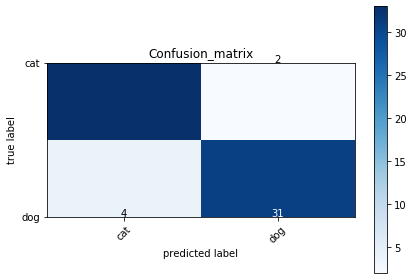

In [146]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')